In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

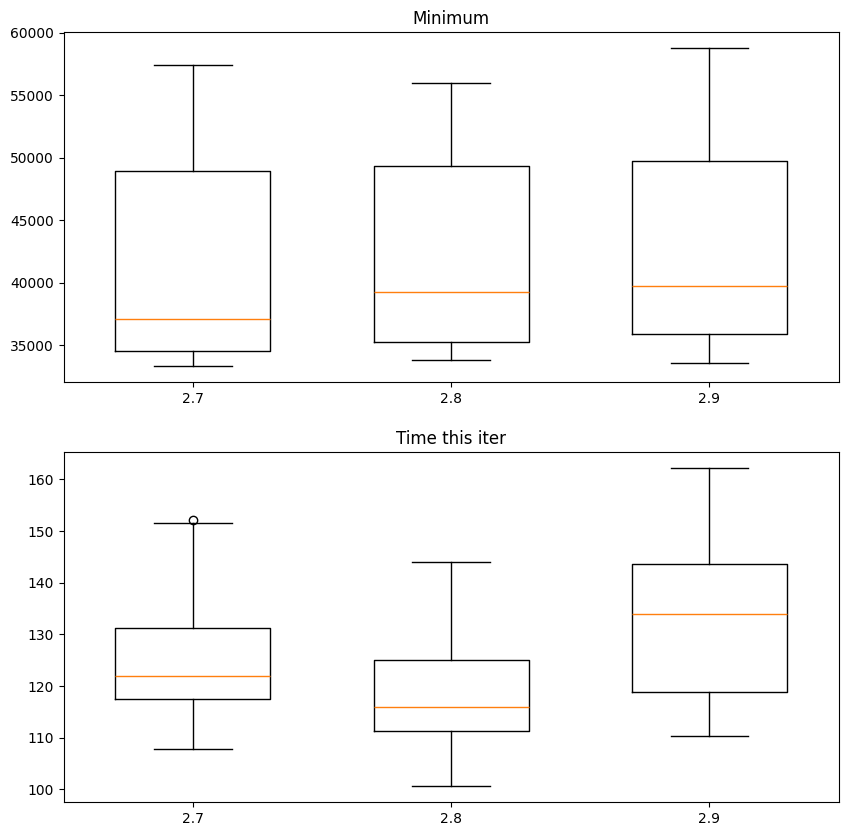

In [25]:
def load_df(filename):
    cols_to_remove = [
        "done", "training_iteration", "trial_id", "date",
        "timestamp", "pid", "hostname", "node_ip", "time_since_restore",
        "time_total_s", "iterations_since_restore"
    ]    
    return pd.read_csv(filename).drop(columns=cols_to_remove)

def calculate_stats(df):
    # first filter df to filter out the 9e99 numbers
    # count, mean, median, mode, range, variance, standard deviation
    stats = {}
    df = df[df['minimum'] != 9e99]
    stats['count'] = df.count()
    stats['mean'] = df.mean()
    stats['median'] = df.median()
    stats['mode'] = df.mode().iloc[0]
    stats['range'] = df.max() - df.min()
    stats['variance'] = df.var()
    stats['std'] = df.std()
    return stats, df

def plot(df_list):
    # Plot boxplot for all df, side by side with labels
    fig, ax = plt.subplots(2, figsize=(10, 10))
    for i, df in enumerate(df_list):
        # Change label to 2.7, 2.8, 2.9
        ax[0].boxplot(df['minimum'], positions=[i], widths=0.6)
        ax[0].set_xticks([0, 1, 2])
        ax[0].set_xticklabels(['2.7', '2.8', '2.9'])
        ax[0].set_title('Minimum')
        ax[1].boxplot(df['time_this_iter_s'], positions=[i], widths=0.6)
        ax[1].set_xticks([0, 1, 2])
        ax[1].set_xticklabels(['2.7', '2.8', '2.9'])
        ax[1].set_title('Time this iter')
df_list = []
for fname in ['ray27.csv', 'ray28.csv', 'ray29.csv']:
    df = load_df(fname)
    stats, df = calculate_stats(df)
    df_list.append(df)
plot(df_list)